# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [5]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud', ylabel='Count'>

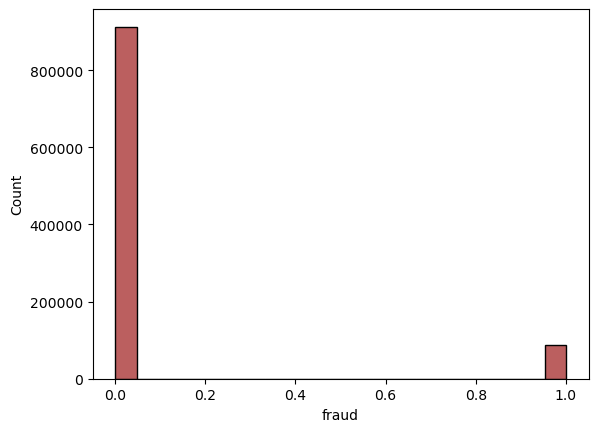

In [7]:
fraud["fraud"].value_counts()
sns.histplot(data=fraud["fraud"], color= "brown")
# imbalanced results

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

features=fraud.drop(columns=["fraud"])
target=fraud["fraud"]


In [9]:
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [10]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.357077,-0.150122,-0.423839,0.366318,1.361603,-0.334533,0.73251
1,0.194157,-0.185739,-0.433963,0.366318,1.361603,-0.334533,0.73251
2,0.443734,-0.150915,-0.484329,0.366318,-0.734428,-0.334533,0.73251
3,-0.402217,-0.166800,-0.460903,-2.729870,1.361603,-0.334533,-1.36517
4,-0.070140,-0.185709,-0.414141,0.366318,1.361603,-0.334533,-1.36517
...,...,...,...,...,...,...,...
799995,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251
799996,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251
799997,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517
799998,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251


In [11]:
LR = LinearRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


0.23365162305341472

In [12]:
LR.score(x_test_st, y_test)

#poor results

0.3121615437681776

In [13]:
!pip install imbalanced-learn


In [14]:

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [15]:
# OverSampling

ros = RandomOverSampler(random_state=0)
x_train_ros, y_train_ros = ros.fit_resample(x_train_st, y_train)

LR_ros = LinearRegression()
LR_ros.fit(x_train_ros, y_train_ros)
pred_ros = LR_ros.predict(x_test_st)

print("Oversampling RMSE:", np.sqrt(mean_squared_error(y_test, pred_ros)))
print("Oversampling R^2 Score:", LR_ros.score(x_test_st, y_test))

Oversampling RMSE: 0.3602807951714486
Oversampling R^2 Score: -0.6354266627690053


In [19]:
#UnderSampling
rus = RandomUnderSampler(random_state=0)
x_train_rus, y_train_rus = rus.fit_resample(x_train_st, y_train)

LR_rus = LinearRegression()
LR_rus.fit(x_train_rus, y_train_rus)
pred_rus = LR_rus.predict(x_test_st)

print("Undersampling RMSE:", np.sqrt(mean_squared_error(y_test, pred_rus)))
print("Undersampling R^2 Score:", LR_rus.score(x_test_st, y_test))

Undersampling RMSE: 0.3600310892800641
Undersampling R^2 Score: -0.6331604628594791


In [20]:
#SMOTE
smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train_st, y_train)

LR_smote = LinearRegression()
LR_smote.fit(x_train_smote, y_train_smote)
pred_smote = LR_smote.predict(x_test_st)

print("SMOTE RMSE:", np.sqrt(mean_squared_error(y_test, pred_smote)))
print("SMOTE R^2 Score:", LR_smote.score(x_test_st, y_test))

SMOTE RMSE: 0.35949168849692903
SMOTE R^2 Score: -0.6282705066697243
